In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
dataset_path='/content/drive/MyDrive/Colab Notebooks/MLOM/Assignments/Assignment_01'

In [19]:
import tensorflow as tf
from tensorflow import keras

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size = (124,124),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training',
    shuffle = 'True')

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size = (124, 124),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation',
    shuffle = 'True')

Found 523 images belonging to 5 classes.
Found 128 images belonging to 5 classes.


In [17]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', strides=1, input_shape=(124,124,3)),
    tf.keras.layers.MaxPooling2D(2, 2),


    tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    #newly added the third convolution
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    #newly added the fourth convolution
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    #newly added the fifth convolution
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dropout(0.5),

    #newly added 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation="relu"),

    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(5, activation='softmax'),

])

In [13]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer=optimizer,
loss='categorical_crossentropy',
metrics=['accuracy'])

In [14]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    #enhance the no of epochs
    epochs=50
)

Epoch 1/50
17/17 [==============================] - 10s 451ms/step - loss: 1.5989 - accuracy: 0.2639 - val_loss: 1.5850 - val_accuracy: 0.2656
Epoch 2/50
17/17 [==============================] - 8s 430ms/step - loss: 1.5836 - accuracy: 0.2677 - val_loss: 1.5775 - val_accuracy: 0.2656
Epoch 3/50
17/17 [==============================] - 9s 516ms/step - loss: 1.5787 - accuracy: 0.2677 - val_loss: 1.5776 - val_accuracy: 0.2656
Epoch 4/50
17/17 [==============================] - 6s 372ms/step - loss: 1.5750 - accuracy: 0.2696 - val_loss: 1.5710 - val_accuracy: 0.2656
Epoch 5/50
17/17 [==============================] - 6s 370ms/step - loss: 1.5686 - accuracy: 0.2658 - val_loss: 1.5642 - val_accuracy: 0.2656
Epoch 6/50
17/17 [==============================] - 9s 524ms/step - loss: 1.5441 - accuracy: 0.2639 - val_loss: 1.5538 - val_accuracy: 0.2734
Epoch 7/50
17/17 [==============================] - 6s 362ms/step - loss: 1.5342 - accuracy: 0.2639 - val_loss: 1.5325 - val_accuracy: 0.3125
Epoch

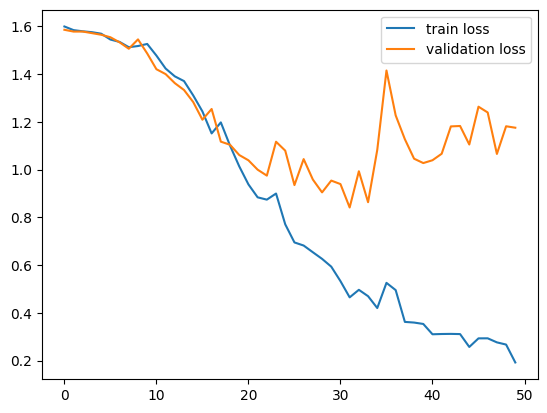

<Figure size 640x480 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
#plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

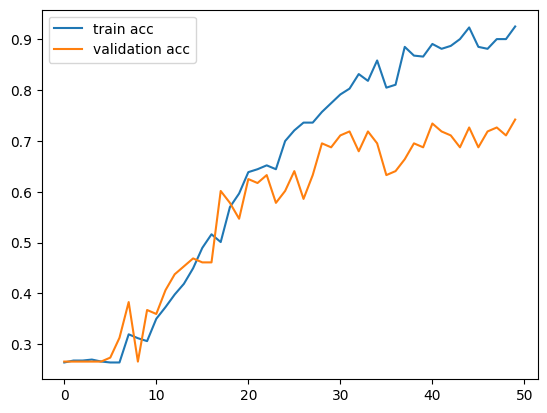

<Figure size 640x480 with 0 Axes>

In [16]:
#plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='validation acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')